<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mersad.esalati@gmail.com">Mersad Esalati</a><br></font><br>
    </div>
</div>

# Beatifulsoup

## News Crawler
News Information:
- Title
- Description
- datetime
- Category
- Agency

In [ ]:
# parse news list page
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import datetime
from tqdm.auto import tqdm

def find_agency(inner_news):
            normal_agency = inner_news.select("[class='news-article-tag']")
            if len(normal_agency) > 0:
                return normal_agency[0].text
            else:
                special_agency = inner_news.select("[class='news-article-tag news-article-tag']")
                return special_agency[0].text

def parse_news_list_page(page_url: str) -> list:
    r = requests.get(url=page_url, 
                     headers={'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246"})
    soup = BeautifulSoup(r.content, 'html5lib')
    inner_news_list = soup.find('div', attrs = {'id':'news-list-inner'}).find_all('div', attrs = {'class':'news-article-min-content'})
    news = list()
    for inner_news in inner_news_list:
        news_item = {
            "title": inner_news.h2.a.text,
            "description": inner_news.find('span', {"class": "news-article-description"}).text,
            "datetime": datetime.datetime.strptime(inner_news.time["datetime"], "%Y-%m-%d %H:%M:%S"),
            "category": inner_news.find('a', {"class": "outline-tag"}).text,
            "agency": find_agency(inner_news),
        }
        news.append(news_item)
    return news


### Currency News Crawler

In [46]:
# crawl data + save into csv file
currency_url = lambda page: f"https://www.tgju.org/news/category/93965/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%A7%D8%B1%D8%B2%DB%8C/page/{page}"

N = 500
current_page = 1
currency_news = list()
pbar = tqdm(total=N)
while len(currency_news) < N:
    news = parse_news_list_page(currency_url(current_page))
    currency_news.extend(news)
    current_page += 1
    pbar.update(len(news))
pbar.close()

currency_news_df = pd.DataFrame(currency_news)
currency_news_df.to_csv("currency_news.csv")
print(currency_news_df.dtypes)
currency_news_df

  0%|          | 0/500 [00:00<?, ?it/s]

title                  object
description            object
datetime       datetime64[ns]
category               object
agency                 object
dtype: object


,title,description,datetime,category,agency
0,قیمت طلا افزایش یافت,\nقیمت طلا امروز (سه‌شنبه) با توقف رشد دلار اف...,2022-10-20 19:06:53,اخبار ارزی,نبض بورس
1,قیمت سکه و دلار ریزش کرد,\nاقتصاد نیوز : قیمت دلار عصر امروز پنجشنبه ۲۸...,2022-10-20 19:06:48,اخبار ارزی,دنیای اقتصاد
2,قیمت لیر ترکیه در آخرین روز هفته کاهش یافت,\nجدیدترین قیمت لیر ترکیه امروز ۲۸ مهر ۱۴۰۱ را...,2022-10-20 18:02:01,اخبار ارزی,نبض بازار
3,پوند از دلار پیشی گرفت؟,\nارزش پوند افزایش یافته است و هزینه های استقر...,2022-10-20 18:01:54,اخبار ارزی,خبر آنلاین
4,واکنش بازار ارز به ادعاهای تازه گروسی درباره ت...,\nبازار ارز پس از دو روز کاهش قیمت، مسیر افزای...,2022-10-20 17:46:35,اخبار ارزی,ایران اکونومیست
...,...,...,...,...,...
495,۵ پرسش مهم درباره متاورس که متا در رویداد امشب...,\n,2022-10-11 14:51:33,اخبار ارزی,دیجی کالا مگ
496,دلار در معاملات امروز چقدر قیمت خورد؟ | جدیدتر...,\nقیمت فروش دلار امروز در صرافی‌های بانکی ۲۸ ه...,2022-10-11 14:46:32,اخبار ارزی,همشهری آنلاین
497,رشد ۹۶۶۲ واحدی شاخص بورس,\nشاخص کل بورس اوراق بهادار تهران در پایان معا...,2022-10-11 14:16:30,اخبار ارزی,خبرگزاری دانشجو
498,قیمت دلار امروز سه شنبه ۱۴۰۱/۷/۱۹,\nدلار در بازار آزاد که روز قبل تا ۳۲،۲۷۰ (سی ...,2022-10-11 14:16:25,اخبار ارزی,خبرگزاری دانشجو


### Gold News Crawler

In [ ]:
# crawl data + save into csv file
gold_url = lambda page: f"https://www.tgju.org/news/category/93964/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%B7%D9%84%D8%A7-%D9%88-%D8%B3%DA%A9%D9%87/page/{page}"

N = 500
current_page = 1
gold_news = list()
pbar = tqdm(total=N)
while len(gold_news) < N:
    news = parse_news_list_page(gold_url(current_page))
    gold_news.extend(news)
    current_page += 1
    pbar.update(len(news))
pbar.close()

gold_news_df = pd.DataFrame(gold_news)
gold_news_df.to_csv("gold_news.csv")
print(gold_news_df.dtypes)
gold_news_df

  0%|          | 0/500 [00:00<?, ?it/s]

title                  object
description            object
datetime       datetime64[ns]
category               object
agency                 object
dtype: object


,title,description,datetime,category,agency
0,قیمت طلا افزایش یافتفلزات گرانبها&nbsp;,\nقیمت طلا با 6 دلار و 25 سنت افزایش به 1671.1...,2022-10-20 19:06:45,اخبار طلا و سکه,ارانیکو
1,دلار پایین آمد، درهم دنده معکوس زد /قیمت سکه ر...,\nاقتصادنیوز : نرخ حواله درهم در بازار امروز د...,2022-10-20 18:11:49,اخبار طلا و سکه,اقتصاد نیوز
2,نیم سکه ۵۰ هزار تومان ارزان شد | ادامه کاهش قی...,\nقیمت هر قطعه سکه تمام‌ بهار آزادی طرح جدید (...,2022-10-20 17:31:42,اخبار طلا و سکه,همشهری آنلاین
3,آخرین قیمت انس طلا؛ ۱۶۳۳ دلار,\nقیمت انس طلا در بازار جهانی با تغییراتی مواج...,2022-10-20 17:06:46,اخبار طلا و سکه,مهر
4,قیمت دلار امروز ۲۸ مهر ماه ۱۴۰۱ / دلار در پایا...,\nقیمت دلار برای تاریخ ۲۸ مهر ماه ۱۴۰۱ اعلام ش...,2022-10-20 17:06:37,اخبار طلا و سکه,اقتصاد آنلاین
...,...,...,...,...,...
495,تصویر جعبه‌ی پیکسل واچ با تأکید بر همکاری با F...,\n,2022-09-26 09:01:51,اخبار طلا و سکه,دیجی کالا مگ
496,پیش‌بینی جالب درباره قیمت سکه در بازار,\nفعالان بازار درباره قیمت طلا و سکه اعتقاد دا...,2022-09-26 09:01:49,اخبار طلا و سکه,اخبار بانک
497,قیمت انواع سکه در بازار امروز (۴ مهر),\nوضعیت حباب انواع سکه (امامی، بهار آزادی، نیم...,2022-09-26 08:46:47,اخبار طلا و سکه,بازار نیوز
498,قیمت طلا به پایین ترین رقم ۲.۵ سال اخیر رسید,\nقیمت هر اونس طلا امروز با ۰.۳۱ درصد کاهش به ...,2022-09-26 08:41:38,اخبار طلا و سکه,اقتصاد آنلاین


## Question 1: Top Agency

In [ ]:
# Download previously crawled data (Or ignore and use the fresh dataframes from above)
! gdown 1jRBUlYGdecwDbgzV89_ODwJlpJ7Gts6N

In [55]:
all_news_df = gold_news_df.append(currency_news_df)
print("### GOLD ###\n", gold_news_df["agency"].value_counts()[:5])
print("\n### CURR ###\n", currency_news_df["agency"].value_counts()[:5])
print("\n### ALL ###\n", all_news_df["agency"].value_counts()[:5])

### GOLD ###
 نبض بازار        98
سایت طلا         71
اقتصاد نیوز      67
اقتصاد آنلاین    54
اخبار ویژه       51
Name: agency, dtype: int64

### CURR ###
 دیجی کالا مگ     53
اقتصاد نیوز      52
دنیای اقتصاد     42
اقتصاد آنلاین    39
اخبار ویژه       28
Name: agency, dtype: int64

### ALL ###
 نبض بازار        125
اقتصاد نیوز      119
اقتصاد آنلاین     93
سایت طلا          87
اخبار ویژه        79
Name: agency, dtype: int64


## Question 2: Daily News Trend

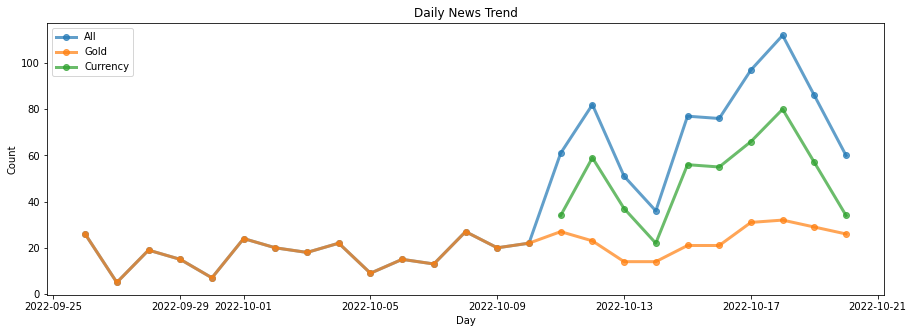

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for df, df_name in zip([all_news_df, gold_news_df, currency_news_df], ["All", "Gold", "Currency"]):
    df["day"] = df["datetime"].dt.floor('d')
    counts = df.groupby(["day"]).count()
    plt.plot(counts.index, counts["title"], label=df_name, 
             linewidth=3, alpha=0.7, marker='o')

plt.title("Daily News Trend")
plt.legend()
plt.ylabel("Count")
plt.xlabel("Day")
plt.show()
# gold_news_df.groupby(["day"]).count().plot(figsize=(10, 5), legend=["All"])

<blockquote>

One insight is that this website has posted more news in Currency category, that made 500 limit to be filled in a shorter period of time. On the other hand the website had posted less about Gold which resulted in a longer timespan to fill the 500 limit. (Also the oldest day count should not be trusted because we may have finished the process and reached 500 limit in the middle of that day and not counted the rest of the day. The same can be said about last day as the day may not have yet been finished.)